In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [6]:
%matplotlib inline

In [2]:
def calculateMdd(df, var, winodw = 20):
    '''

    Window refers how window to look back in calculating maximum drawdown.

    :param winodw:
    :return:
    '''
    return df.prc.rolling(window = window).apply(lambda x : (min(x)-max(x))/max(x))

In [3]:
#preproc

df = pd.read_csv("Price.csv")
df.dropna(inplace=True)
#df.iloc[:,0] = df.iloc[:,0].apply(lambda x: pd.Timestamp(x))
df.iloc[:,0] = pd.to_datetime(df.iloc[:,0])
df.columns = ['date', 'prc']
df.sort_values(['date'],inplace=True)
#df['ret'] = df.prc.pct_change(1)
df.set_index('date',inplace=True)

In [4]:
window = 10

df['mdd_noFunc'] = df.prc.rolling(window = window).apply(lambda x : (min(x)-max(x))/max(x))
df['mdd1'] = calculateMdd(df,'ret',window)

C:\Users\Cho\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Cho\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if __name__ == '__main__':


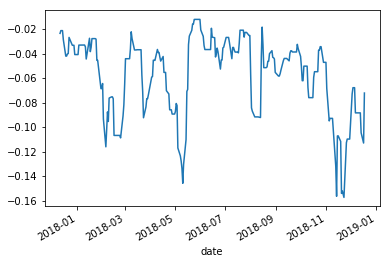

In [7]:
df.mdd1.plot()
plt.show()